# 1. Introduction

**Name**     : Muhammad Vincar Rafi Theoseta <br>
**Batch**    : HCK-18 <br>
**Dataset**  : [Glaucoma Detection](https://universe.roboflow.com/isp005/glaucoma-detection-sttfw/dataset/1) <br>
**Objective**: Creating a Computer Vision Model to predict whether an image has symptoms of glaucoma<br>
**Deployment**: [Huggingface](https://huggingface.co/spaces/vincar12/glaucoma-predict)


# 2. Import Library

Importing libraries that will be used in this project

In [1]:
# Basic use
import random
import os
import glob
import numpy as np
import pandas as pd
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# Learning
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

Loading the data of eye scans that will be used for the model by setting the path for the folder containing the images

In [2]:
# Set main path
main_path= '/Users/vincartheoseta/Hacktiv/Phase 2/GC7/p2-ftds018-hck-g7-new-vincar12/Glaucoma Detection.v1i.folder'
os.listdir(main_path)

['README.roboflow.txt',
 'valid',
 'README.dataset.txt',
 '.DS_Store',
 'test',
 'train']

Setting the path for train, test, and validation data

In [3]:
# Set path for train, test and valid
train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
valid_dir = os.path.join(main_path, 'valid')
print(train_dir)
print(test_dir)
print(valid_dir)

/Users/vincartheoseta/Hacktiv/Phase 2/GC7/p2-ftds018-hck-g7-new-vincar12/Glaucoma Detection.v1i.folder/train
/Users/vincartheoseta/Hacktiv/Phase 2/GC7/p2-ftds018-hck-g7-new-vincar12/Glaucoma Detection.v1i.folder/test
/Users/vincartheoseta/Hacktiv/Phase 2/GC7/p2-ftds018-hck-g7-new-vincar12/Glaucoma Detection.v1i.folder/valid


# 4. Exploratory Data Analysis

Checking the number of data for each class

In [4]:
# Check data number
def check_dir(dir=None, labels=None):
  for label in labels:
    num_data= len(os.listdir(os.path.join(dir, label)))
    print(f'total number of {label} : {num_data}')

print('train set: \n' + '='*50)
check_dir(train_dir,['CNV', 'DME', 'DRUSEN', 'NORMAL'])

print('\ntest set: \n' + '='*50)
check_dir(test_dir,['CNV', 'DME', 'DRUSEN', 'NORMAL'])

train set: 
total number of CNV : 1627
total number of DME : 1695
total number of DRUSEN : 1655
total number of NORMAL : 1747

test set: 
total number of CNV : 234
total number of DME : 221
total number of DRUSEN : 260
total number of NORMAL : 245


Insight: Data is quite balanced for each class with all of them represented relatively equal

Splitting the data into each of the classes accordingly

In [5]:
# Splitting dataset into classes
train_normal = glob.glob(train_dir+"/NORMAL/*.jpg")
train_DRUSEN = glob.glob(train_dir+"/DRUSEN/*.jpg")
train_DME = glob.glob(train_dir+"/DME/*.jpg")
train_CNV = glob.glob(train_dir+"/CNV/*.jpg")

test_normal = glob.glob(test_dir+"/NORMAL/*.jpg")
test_DRUSEN = glob.glob(test_dir+"/DRUSEN/*.jpg")
test_DME = glob.glob(test_dir+"/DME/*.jpg")
test_CNV = glob.glob(test_dir+"/CNV/*.jpg")

valid_normal = glob.glob(valid_dir+"/NORMAL/*.jpg")
valid_DRUSEN = glob.glob(valid_dir+"/DRUSEN/*.jpg")
valid_DME = glob.glob(valid_dir+"/DME/*.jpg")
valid_CNV = glob.glob(valid_dir+"/CNV/*.jpg")

Function to randomize the data to select it for visualization

In [6]:
# Function to randomize data
def random_sample(image_files, num_samples=5):
  random_files= random.sample(image_files, num_samples)
  return random_files

Selecting 5 random samples from each class to be displayed

In [7]:
# Select random data
random_train_normal= random_sample(train_normal,num_samples=5)
random_train_DME= random_sample(train_DME, num_samples=5)
random_train_DRUSEN= random_sample(train_DRUSEN,num_samples=5)
random_train_CNV= random_sample(train_CNV, num_samples=5)

Function to visualize the samples

In [8]:
# Function to visualize
def visualize_img(random_data, labels=None):
  fig, axes= plt.subplots(1,5, figsize=(15,12))
  for i, image_path in enumerate(random_data):
    image= plt.imread(image_path)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'{labels}, {image.shape}')
    axes[i].axis('off')
  plt.show()

Visualizing the samples from each class

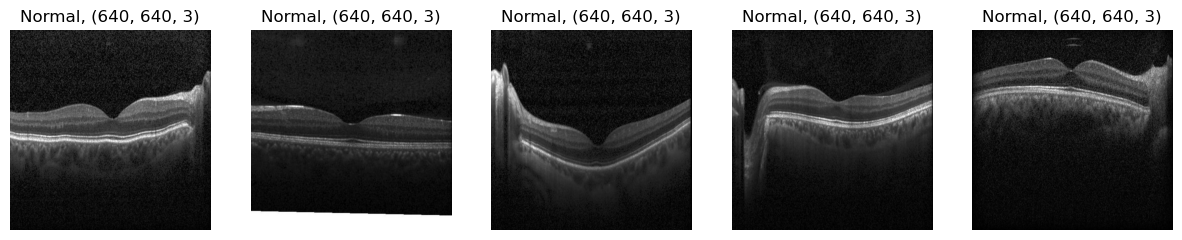

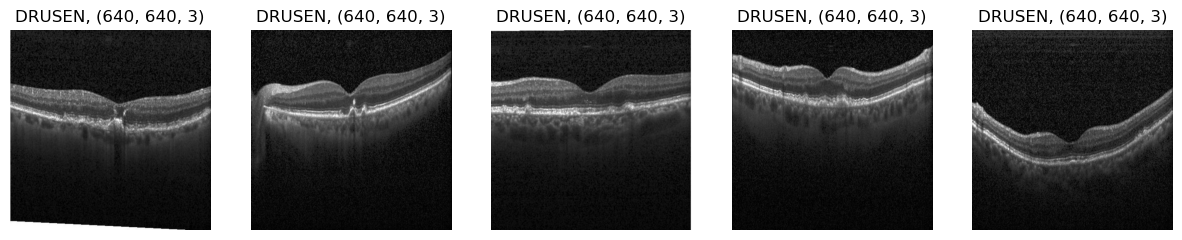

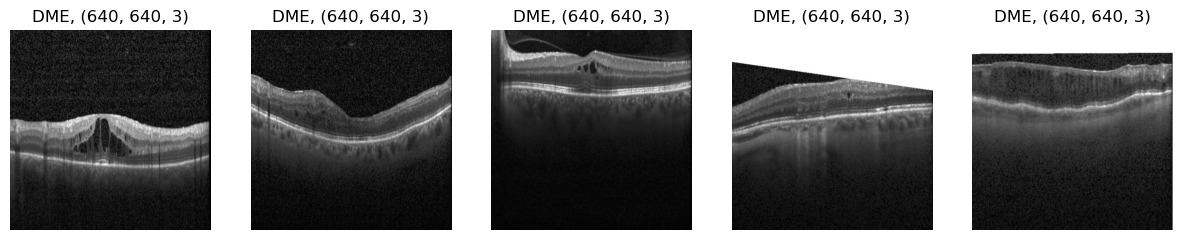

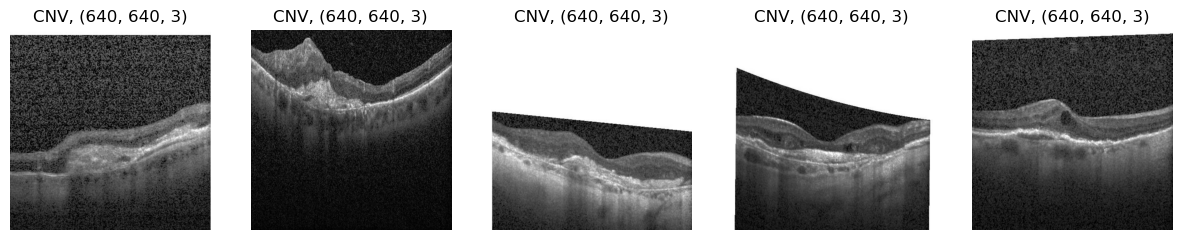

In [9]:
# Visualize random data
visualize_img(random_train_normal, 'Normal')
visualize_img(random_train_DRUSEN, 'DRUSEN')
visualize_img(random_train_DME, 'DME')
visualize_img(random_train_CNV, 'CNV')

# 5. Preprocessing

Preprocessing the images from the dataset in order for the model to be able to process and learn the data, starting with setting the image height and width so the model can learn on a smaller size which helps in computing time.

In [10]:
# Set image properties
img_height = 160
img_width = 160
batch_size = 64

# Process train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=30,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    # color_mode="grayscale",
    shuffle=False
)

# Process validation dataset
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed=30,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    # color_mode="grayscale",
    shuffle=False
)

# Process test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=30,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    # color_mode="grayscale",
    shuffle=False
)


Found 6724 files belonging to 4 classes.
Found 1922 files belonging to 4 classes.
Found 960 files belonging to 4 classes.


Display the index for each class

In [12]:
# Show class index
list_class= train_ds.class_names
nama_class= 'CNV'
class_index= list_class.index(nama_class)
print(class_index)

list_class= train_ds.class_names
nama_class= 'DME'
class_index= list_class.index(nama_class)
print(class_index)

list_class= train_ds.class_names
nama_class= 'DRUSEN'
class_index= list_class.index(nama_class)
print(class_index)

list_class= train_ds.class_names
nama_class= 'NORMAL'
class_index= list_class.index(nama_class)
print(class_index)

0
1
2
3


## 5.2. Augmentation

Augmentation is generating images that are altered such as rotated, zoomed, flipped, etc. to artificially increase the data learned by the model so that it has a much more varied data to learn from. Rescaling is also essential so that the image can be processed by the model

Found 6724 images belonging to 4 classes.
Found 1922 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


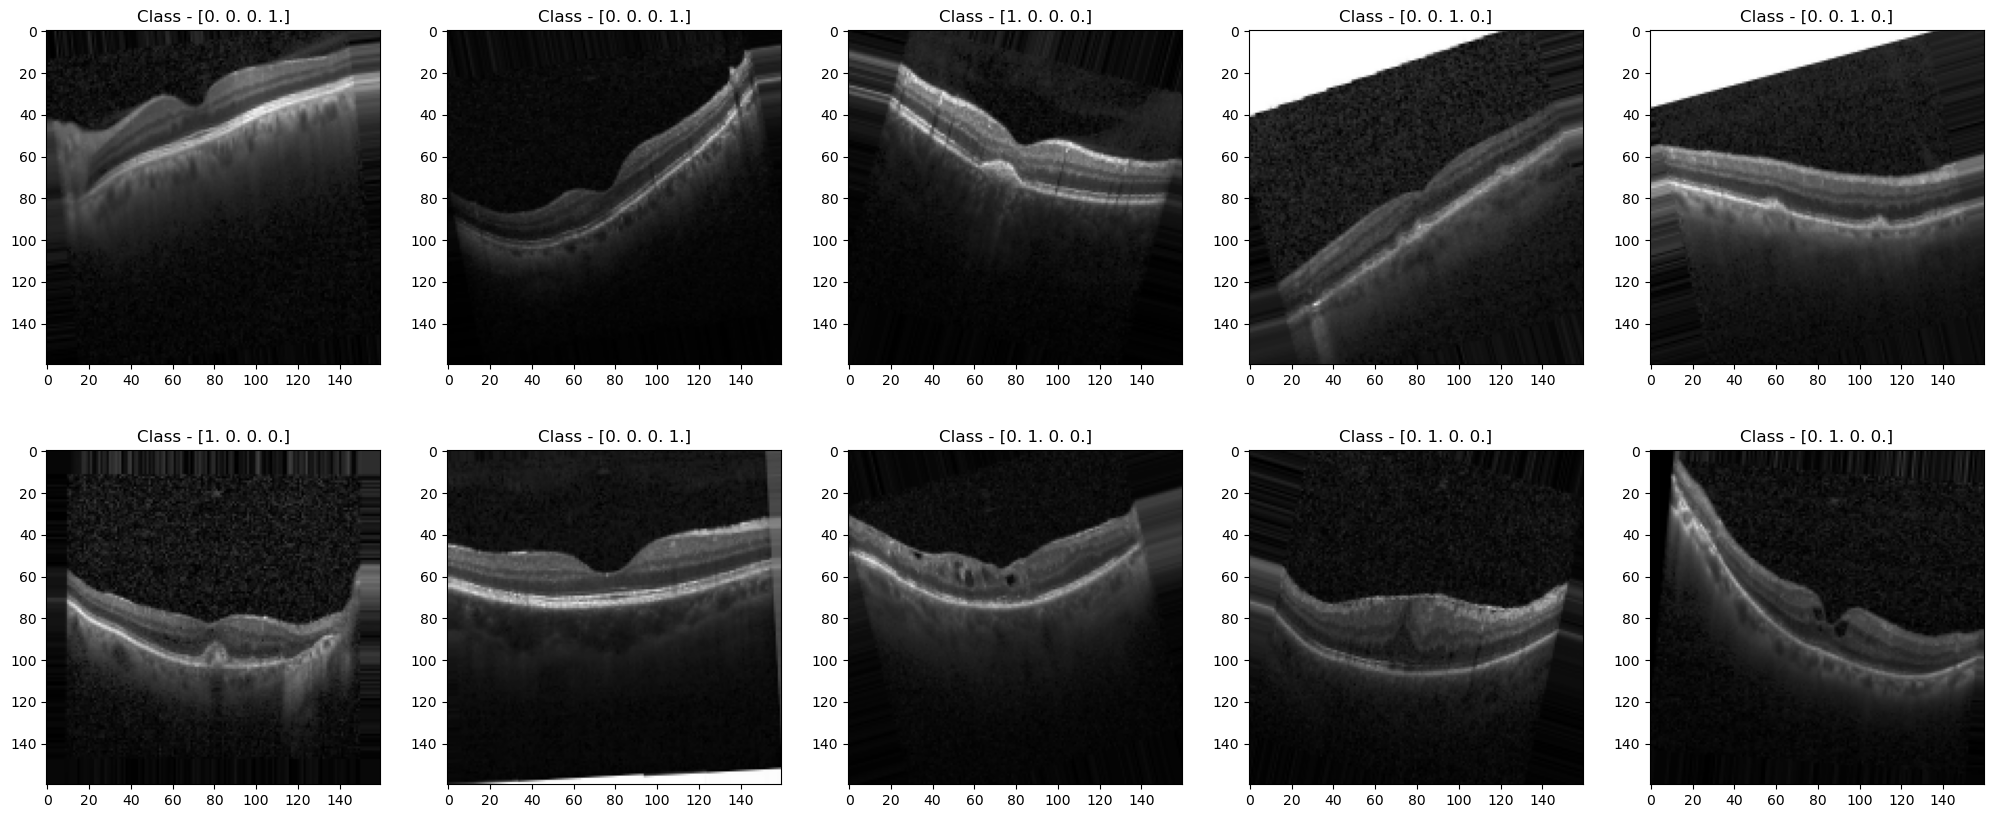

In [13]:
# Data Augmentation for Training
imgen3 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=[1, 1.2],
    horizontal_flip=True
)

# Only Rescaling for Validation
imgenval = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Only Rescaling for Testing
imscale = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Training Data Generator
train_gen = imgen3.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=30
)

# Validation Data Generator
val_gen = imgenval.flow_from_directory(
    valid_dir,
    target_size=(160, 160),
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
    seed=30
)

# Test Data Generator
test_gen = imscale.flow_from_directory(
    test_dir,
    target_size=(160, 160),
    # color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

# Show images of train-set
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
n = 0

for i in range(2):
    for j in range(5):
        img = train_gen[0][0][n] * 255  # Scale back to [0, 255]
        img = img.astype('uint8')      # Convert to uint8 for display
        ax[i][j].imshow(img)
        ax[i][j].set_title('Class - ' + str(train_gen[0][1][n]))
        n += 1


# 6. ANN Training

This section will have training of the Artificial Neural Network model on the dataset that has been preprocessed

## 6.1. Sequential Definition

Clearing the session and seeding helps maintain the result of this project regardless of when it is run.

In [14]:
# Clear Session
seed = 30
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

This model will have a sequential API with a layer of Convolutional, Flatten, 3 hidden layers, and an output layer. The 3 hidden layers will have 256, 128, and 64 neurons. The number of neurons in the output layer is based on how many classes there are of the data, which is 4. 

In [15]:
# Create Sequential API
model_sequential_alpha = Sequential()

# Layer Conv
model_sequential_alpha.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160, 3)))
model_sequential_alpha.add(MaxPooling2D(pool_size= 2, strides=2))

# Flatten
model_sequential_alpha.add(Flatten())

# Dense
model_sequential_alpha.add(Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_alpha.add(Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_alpha.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

# Output
model_sequential_alpha.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile
model_sequential_alpha.compile(loss='categorical_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential_alpha.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 99856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,563,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,605,252 (97.68 MB)

 Trainable params: 25,605,252 (97.68 MB)

 Non-trainable params: 0 (0.00 B)

Plotting the layers to make it easier to understand

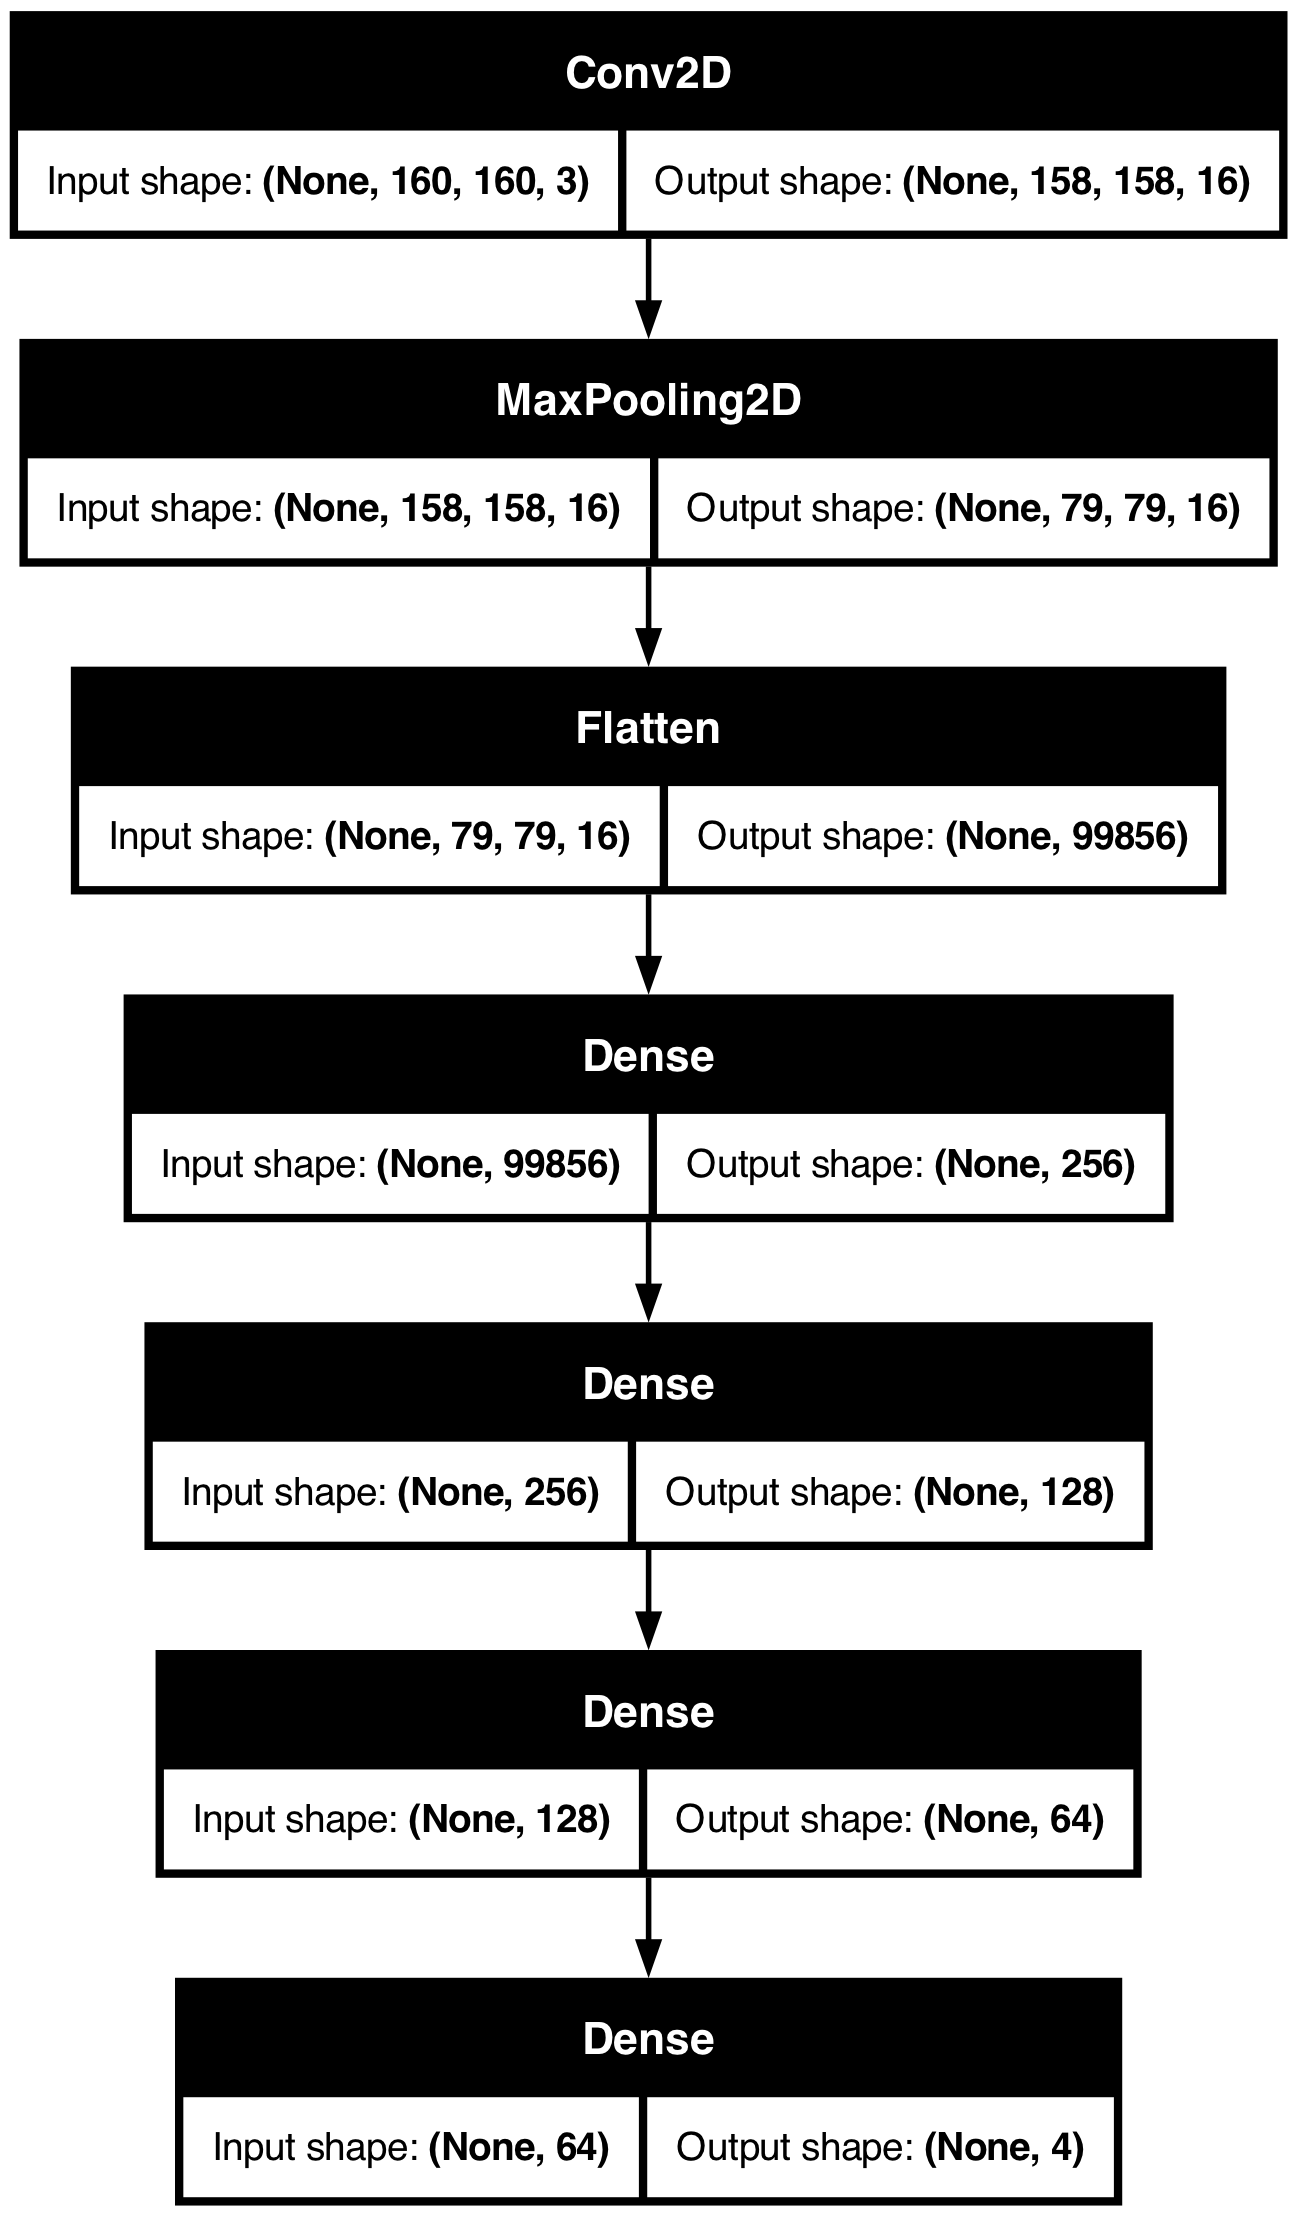

In [16]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential_alpha, show_shapes=True)

## 6.2. Model Training

Training the sequential model with 30 epochs or repetitions with the early stopping function to stop the model after the model stops learning and the metrics worsen.

In [17]:
# Train the Model
history_seq_alpha = model_sequential_alpha.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=early_stopping)

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.2691 - loss: 1.9462 - val_accuracy: 0.3574 - val_loss: 1.3329
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.3752 - loss: 1.3150 - val_accuracy: 0.3694 - val_loss: 1.3457
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4363 - loss: 1.2327 - val_accuracy: 0.4063 - val_loss: 1.3529
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.4800 - loss: 1.1882 - val_accuracy: 0.4318 - val_loss: 1.2718
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.4961 - loss: 1.1385 - val_accuracy: 0.4922 - val_loss: 1.1409
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5067 - loss: 1.1344 - val_accuracy: 0.4547 - val_loss: 1.3309
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5361 - loss: 1.0709 - val_accuracy: 0.5317 - val_loss: 1.0775
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5616 - loss: 1.0156 - val_accu

## 6.3. Model Evaluation

Evaluating the model using plots to make it easier to comprehend

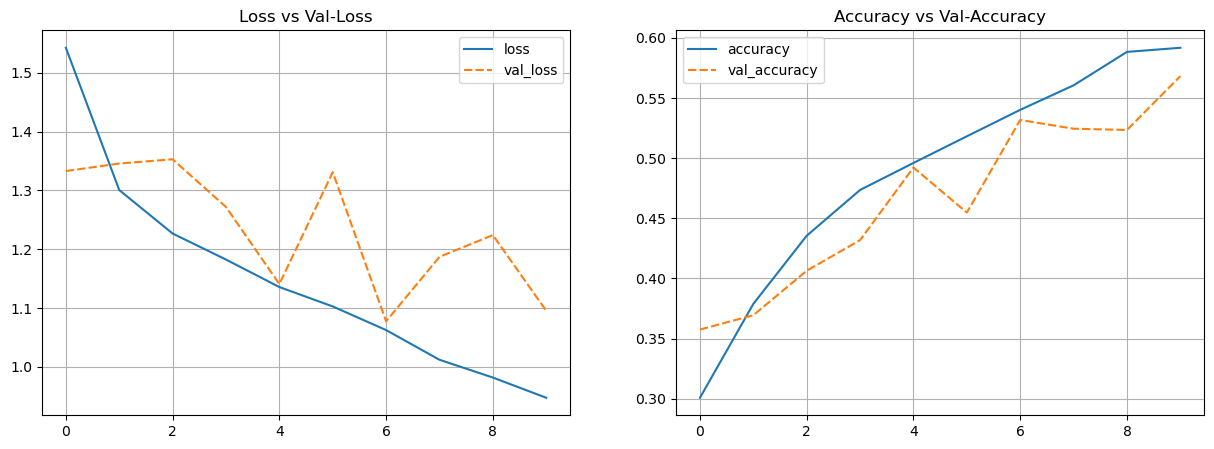

In [18]:
# Plot Training Results
history_seq_alpha_df = pd.DataFrame(history_seq_alpha.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_alpha_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_alpha_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Insight:
1. From the left plot it can be seen that the training loss decreases steadily over each epoch, while the validation loss seems to be erratic throughout.
2. The right plot shows the accuracy of the training keeps steadily increasing smoothly, meanwhile the accuracy of the validation shows a slightly erratic movement after trending upwards halfway through.
3. The two plots then suggests a potential overfitting in the model, where the model is learning the training data but does not translate the learning to the validation data.
4. The model stopped at only the 10th epoch and peaked at 58% accuracy which is not ideal.

Evaluating the result with the test data

In [19]:
# Evaluate results
result = model_sequential_alpha.evaluate(test_gen)
print('Loss: ', result[0])
print('Accuracy: ', result[1])

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.6030 - loss: 0.9541
Loss:  1.0885124206542969
Accuracy:  0.5427083373069763


The metrics on the test dataset also shows a similar story to the plots with only 54% accuracy and a large amount of loss/error

# 7. ANN Improvement

Clearing the session before improving the model to ascertain that the model is on a fresh slate and not just continuing from the previous model

In [20]:
# Clear Session
seed = 30
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

The improvement on the model is done by adding more Convolutional layers, Less hidden layers with less neurons, and adding dropouts

In [21]:
# Create Sequential API with more Conv, Less Hidden Layers, Add Dropout
model_sequential_gamma = Sequential()

# Conv Layer 1
model_sequential_gamma.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160, 3)))
model_sequential_gamma.add(MaxPooling2D(pool_size=2, strides=2))

# Conv Layer 2
model_sequential_gamma.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_sequential_gamma.add(MaxPooling2D(pool_size=2, strides=2))

# Conv Layer 3
model_sequential_gamma.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_sequential_gamma.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten Layer
model_sequential_gamma.add(Flatten())

# Dense Layers with Dropout
model_sequential_gamma.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_gamma.add(Dropout(0.3))
model_sequential_gamma.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_gamma.add(Dropout(0.2))

# Output Layer
model_sequential_gamma.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_sequential_gamma.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_sequential_gamma.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,327,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,352,964 (5.16 MB)

 Trainable params: 1,352,964 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

Plotting the layers

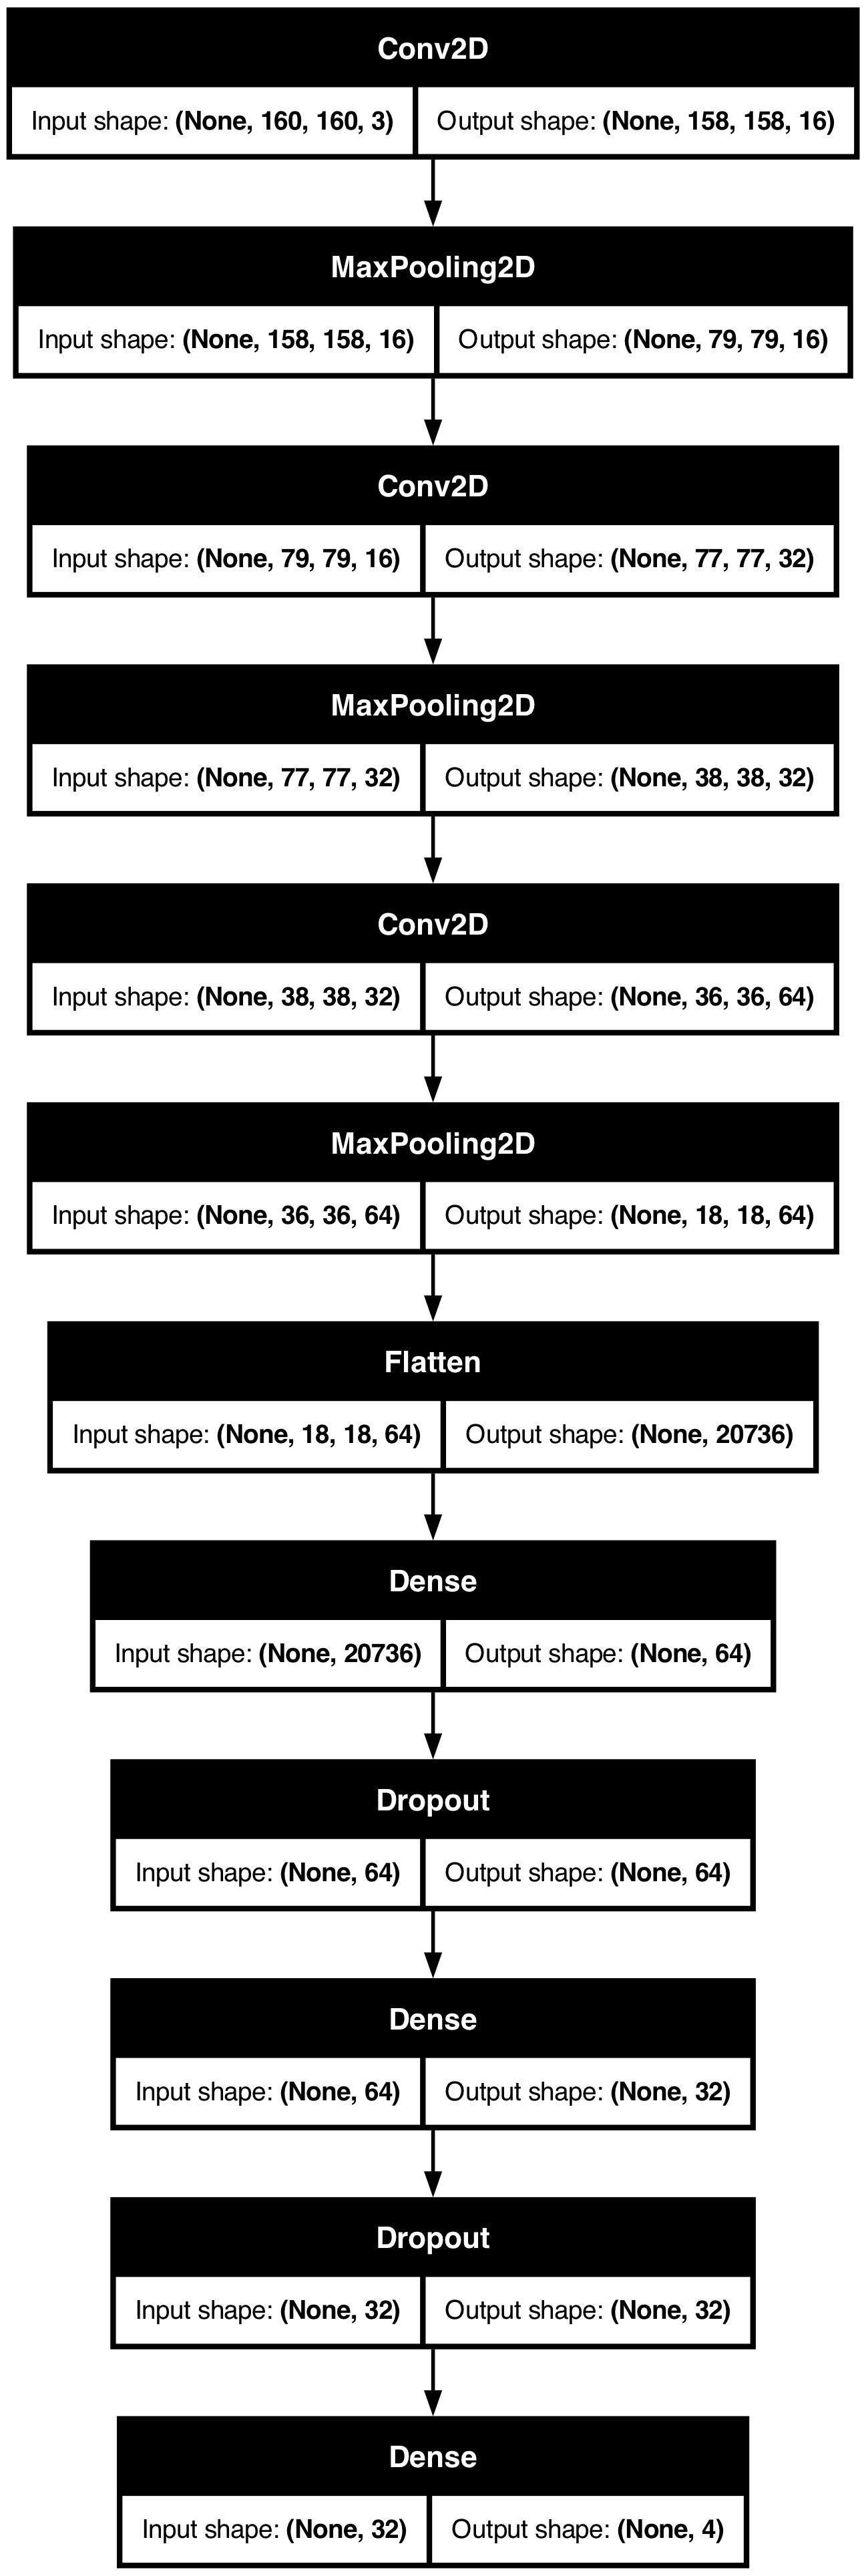

In [22]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential_gamma, show_shapes=True)

## 7.2. Model Training

Training the improved model with the same epochs and early stopping

In [23]:
# Train the Model
history_seq_gamma = model_sequential_gamma.fit(train_gen, epochs=30, validation_data=val_gen, callbacks=early_stopping)

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.2718 - loss: 1.3896 - val_accuracy: 0.3543 - val_loss: 1.3006
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.3839 - loss: 1.2925 - val_accuracy: 0.5026 - val_loss: 1.0944
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5200 - loss: 1.0868 - val_accuracy: 0.5656 - val_loss: 0.9585
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5650 - loss: 1.0012 - val_accuracy: 0.6035 - val_loss: 0.9113
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5887 - loss: 0.9661 - val_accuracy: 0.6270 - val_loss: 0.8602
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6179 - loss: 0.8999 - val_accuracy: 0.6160 - val_loss: 0.8936
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6424 - loss: 0.8558 - val_accuracy: 0.6660 - val_loss: 0.7919
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6533 - loss: 0.8294 - val_accu

## 7.3. Model Evaluation

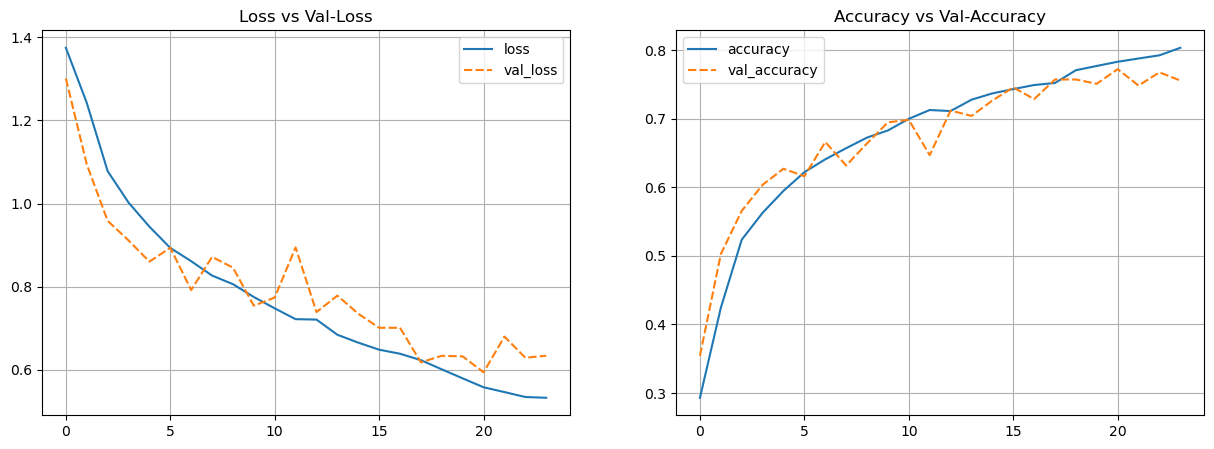

In [24]:
# Plot Training Results
history_seq_gamma_df = pd.DataFrame(history_seq_gamma.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_gamma_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_gamma_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Insight:
1. From the left plot it can be seen that the training loss decreases steadily over each epoch similar to the first model, while the validation loss keeps following the train loss despite some jagged movements.
2. The plot on the right shows the accuracy of the model. The training accuracy keeps steadily increasing smoothly, meanwhile the accuracy of the validation follows the training accuracy through each epochs albeit some erraticness. This shows that the model is more accurately classifying unseen data than the previous model.
3. The two plots then show an improvement over the first model by way of less overfitting, better accuracy, and also at a smaller size than the previous model

Evaluating the result with the test data

In [25]:
# Evaluate results
result = model_sequential_gamma.evaluate(test_gen)
print('Loss: ', result[0])
print('Accuracy: ', result[1])

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step - accuracy: 0.8056 - loss: 0.4919
Loss:  0.5643498301506042
Accuracy:  0.793749988079071


The result shows a similar score with the training scores, suggesting a stable model that can be utilized as inference.

Classification report based on the improved model

In [27]:
# Predict probabilities on the test data
test_proba = model_sequential_gamma.predict(test_gen)

# Convert probabilities to class labels
test_pred_max = np.argmax(test_proba, axis=1)

# Extract true labels from the test data
test_true = test_gen.classes

# Print the classification report
print(classification_report(test_true, test_pred_max))

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 454ms/step
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       234
           1       0.88      0.68      0.77       221
           2       0.81      0.72      0.76       260
           3       0.73      0.90      0.81       245

    accuracy                           0.79       960
   macro avg       0.80      0.79      0.79       960
weighted avg       0.80      0.79      0.79       960



Insight:
- The overall score on accuracy of the model is 79%
- A consistent weighted average also suggests that the model performs quite well on all classes
- Classes CNV and NORMAL have a high recall score suggesting the model is good at predicting both classes while keeping the false negatives low(predicted to be not CNV or NORMAL but actually belongs to the class)
- While class DME excel at precision which means the model is good at keeping the false positives(predicted to be DME but actually not) low on this class. However the recall score is quite low, suggesting the model often predicts a data to not be DME when it actually is. This big gap between precision and recall affects the f1 score
- The DRUSEN class looks to have the lowest f1 score due to having moderate scores on precision and recall

# 8. Model Saving

Saving the model by freezing the trainable parameters so the model does not keep learning on data for inferencing.

In [28]:
# Freeze model
model_sequential_gamma.trainable = False
model_sequential_gamma.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,327,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,058,894 (15.48 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,352,964 (5.16 MB)

 Optimizer params: 2,705,930 (10.32 MB)

Save model as keras file

In [29]:
model_sequential_gamma.save('model_sequential.keras')

# 9. Conclusion

1. Based on the dataset it can be said that the data is quite balanced with all classes represented relatively equal.
2. Classification of the dataset is divided into 4 classes which is then used for training by the model.
3. A model is successfully created to classify images into the 4 glaucoma classes
4. It has a moderately good accuracy of 79% in predicting which class of glaucome an image is.
5. The model used for saving is the improved model_sequential_gamma which demonstrates a much higher score and a more stable metrics compared to the first model which exhibited signs of overfitting.
6. Considering the moderate accuracy there is still room for improvement. 
7. Possible improvements are: experimenting on neurons, batch size, regularizer, and learning rate